In [0]:
#import required libraries
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

C:\Users\rajna\Anaconda3\envs\for_tsfresh\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\rajna\Anaconda3\envs\for_tsfresh\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
# We set the logger to Error level
# This is not recommend for normal use as you can oversee important Warning messages
import logging
logging.basicConfig(level=logging.ERROR)

In [0]:
# read the file containing samples(60) of each instance of the time series signal
import pandas
#df = pandas.read_clipboard()
df = pandas.read_csv('data_240_percent_wise_noise.csv')

In [0]:
extraction_settings = ComprehensiveFCParameters()
import pandas
X_act = extract_features(df, 
                     column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function= impute);

Feature Extraction: 100%|████████████████████████████████████████████████████████████| 240/240 [00:40<00:00,  5.94it/s]


In [0]:
X = X_act.copy()
X.head()

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""","F_x__agg_autocorrelation__f_agg_""median""","F_x__agg_autocorrelation__f_agg_""var""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,F_x__time_reversal_asymmetry_statistic__lag_1,F_x__time_reversal_asymmetry_statistic__lag_2,F_x__time_reversal_asymmetry_statistic__lag_3,F_x__value_count__value_-inf,F_x__value_count__value_0,F_x__value_count__value_1,F_x__value_count__value_inf,F_x__value_count__value_nan,F_x__variance,F_x__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1,23.559930,3.353147,-0.147228,-0.308977,0.199804,0.654013,0.184284,0.024176,0.064471,0.968531,...,0.002441,0.005745,0.009956,0.0,0.0,0.0,0.0,0.0,0.054831,0.0
2,26.331886,3.687023,-0.130584,-0.218328,0.112669,0.781352,-0.019734,-0.001854,0.046962,1.000000,...,0.003156,0.009125,0.014544,0.0,1.0,1.0,0.0,0.0,0.046887,0.0
3,19.136452,6.137332,-0.147047,-0.326450,0.153592,0.724034,-0.007236,-0.000985,0.068061,1.000000,...,0.001171,0.003190,0.003942,0.0,1.0,1.0,0.0,0.0,0.049976,0.0
4,18.946095,8.670061,-0.098195,-0.155699,0.064295,0.803290,-0.291715,-0.024707,0.040507,1.000000,...,0.000466,0.001596,0.005786,0.0,1.0,1.0,0.0,0.0,0.047768,0.0
5,25.544337,10.262140,-0.056122,-0.107229,0.046421,0.785678,0.326568,0.028011,0.040535,1.000000,...,0.005273,0.010656,0.015690,0.0,1.0,1.0,0.0,0.0,0.048391,0.0


In [0]:
import numpy as np
y_act = pandas.read_csv('label_data_240_percent_wise_noise.csv')

y_act = np.array(y_act['label'])
y_act = pandas.Series(y_act, index = np.arange(1,241))

y = y_act.copy()

y.head()

1    0
2    1
3    0
4    1
5    0
dtype: int64

In [0]:
X['label'] = y

train = X[0:180].copy()
test = X[180:240].copy()

In [0]:
y_train = train['label']
x_train = train.drop('label', 1)

y_test = test['label']
x_test = test.drop('label', 1)

In [0]:
# Removing features with low variance
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
sel.fit_transform(x_train)
sel.get_support(indices=True)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  85,
        86,  90,  91,  92,  95,  96,  97,  98, 100, 101, 102, 103, 104,
       105, 110, 111, 115, 116, 117, 120, 121, 122, 123, 125, 126, 127,
       128, 129, 130, 135, 136, 140, 141, 142, 145, 146, 147, 148, 150,
       151, 152, 153, 154, 155, 160, 161, 165, 166, 167, 170, 171, 172,
       173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 22

In [0]:
ind_varThresh = sel.get_support(indices=True)

In [0]:
#for i in ind_varThresh:
#    print(x_train.columns[i])

In [1]:
X_filtered = x_train.ix[:,ind_varThresh]
X_filtered.head()

NameError: ignored

In [0]:
import numpy as np
x_a = np.array(X_filtered).copy()
y_a = np.array(y_train).copy()

C:\Users\rajna\Anaconda3\envs\for_tsfresh\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\rajna\Anaconda3\envs\for_tsfresh\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


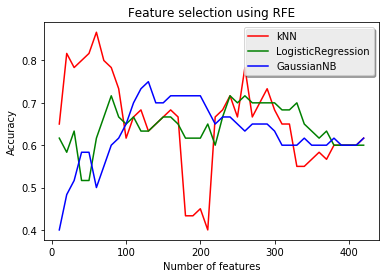

In [0]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 1)
rfe = rfe.fit(X_filtered, y_train)

idx = rfe.ranking_
rank_rfe = {}
p = 0;
for q in range(X_filtered.columns.size):
    if X_filtered.columns[q] not in rank_rfe:
        rank_rfe[X_filtered.columns[q]] = idx[q]
        
#rank_rfe

sort_ind = sorted(rank_rfe, key=rank_rfe.get, reverse = False)


nf = []
acc_all_svm = []
acc_all_knn = []
acc_all_lo_reg = []
acc_all_nb = []

for it in range(int(X_filtered.columns.size/10)):
    num_fea = 10 * (it+1)
    nf.append(num_fea)
    col = sort_ind[0:num_fea]
    
    selected_features_train = X_filtered.ix[:, col].copy()
    selected_features_test = x_test.ix[:, col].copy()

    #SVM classifier (linear)
    clf = svm.LinearSVC()
    clf.fit(selected_features_train, y_train)
    y_predict_svm = clf.predict(selected_features_test)
    acc_svm = accuracy_score(y_test, y_predict_svm)
    acc_all_svm.append(acc_svm)
    
    
    #SVM classifier (linear)
    from sklearn import svm
    clf = GaussianNB()
    clf.fit(selected_features_train, y_train)
    y_predict_nb = clf.predict(selected_features_test)
    acc_nb = accuracy_score(y_test, y_predict_nb)
    acc_all_nb.append(acc_nb)

   

    #kNN classifier
    clf_knn = KNeighborsClassifier(n_neighbors=7)
    clf_knn.fit(selected_features_train, y_train)
    y_predict_knn = clf_knn.predict(selected_features_test)
    acc_knn = accuracy_score(y_test, y_predict_knn)
    acc_all_knn.append(acc_knn)

    
    
    model = LogisticRegression()
    model.fit(selected_features_train, y_train)
    y_predict_lo_reg= model.predict(selected_features_test)
    acc_lo_reg = accuracy_score(y_test, y_predict_lo_reg)
    acc_all_lo_reg.append(acc_lo_reg)
    
    

plot1, = plt.plot(nf,acc_all_knn, 'r')
#plot2, = plt.plot(nf,acc_all_svm,  'r')
plot3, = plt.plot(nf,acc_all_lo_reg,  'g')
plot4, = plt.plot(nf,acc_all_nb,  'b')

# make legend
plt.legend((plot1, plot3, plot4), ('kNN', 'LogisticRegression', 'GaussianNB'), loc='upper right', shadow=True)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Feature selection using RFE')
plt.show()

C:\Users\rajna\Anaconda3\envs\for_tsfresh\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [62] are constant.
  UserWarning)
C:\Users\rajna\Anaconda3\envs\for_tsfresh\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


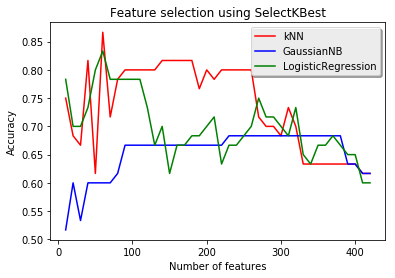

In [0]:
#for average ranking purpose(not used here)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
rank_SelectKBest_f_classif = {}
for p in range(X_filtered.columns.size):
        X_new = SelectKBest(f_classif, k=p+1).fit(X_filtered, y_train)
        new = X_new.get_support(indices=True)
        for q in new:
            if X_filtered.columns[q] not in rank_SelectKBest_f_classif:
                rank_SelectKBest_f_classif[X_filtered.columns[q]] = p+1
                
#rank_SelectKBest_f_classif
sort_ind = sorted(rank_SelectKBest_f_classif, key=rank_SelectKBest_f_classif.get, reverse = False)


nf = []
acc_all_svm = []
acc_all_knn = []
acc_all_lo_reg = []
for it in range(int(X_filtered.columns.size/10)):
    num_fea = 10 * (it+1)
    nf.append(num_fea)
    col = sort_ind[0:num_fea]
    
    selected_features_train = X_filtered.ix[:, col].copy()
    selected_features_test = x_test.ix[:, col].copy()

    #SVM classifier (linear)
    from sklearn import svm
    clf = GaussianNB()
    clf.fit(selected_features_train, y_train)

    y_predict_svm = clf.predict(selected_features_test)

    from sklearn.metrics import accuracy_score
    acc_svm = accuracy_score(y_test, y_predict_svm)
    acc_all_svm.append(acc_svm)

    from sklearn import svm
    from sklearn.neural_network import MLPClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neighbors import KNeighborsClassifier


    clf_knn = KNeighborsClassifier(n_neighbors=7)
    clf_knn.fit(selected_features_train, y_train)
    y_predict_knn = clf_knn.predict(selected_features_test)
    acc_knn = accuracy_score(y_test, y_predict_knn)
    acc_all_knn.append(acc_knn)

    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    # Train the model using the training sets and check score
    model.fit(selected_features_train, y_train)
    model.score(selected_features_train, y_train)
    y_predict_lo_reg= model.predict(selected_features_test)
    acc_lo_reg = accuracy_score(y_test, y_predict_lo_reg)
    acc_all_lo_reg.append(acc_lo_reg)
    
    
    
# f_classif
plot1, = plt.plot(nf,acc_all_knn, 'r')
plot2, = plt.plot(nf,acc_all_svm,  'b')
plot3, = plt.plot(nf,acc_all_lo_reg,  'g')

# make legend
plt.legend((plot1, plot2, plot3), ('kNN', 'GaussianNB', 'LogisticRegression'), loc='upper right', shadow=True)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Feature selection using SelectKBest')
plt.show()

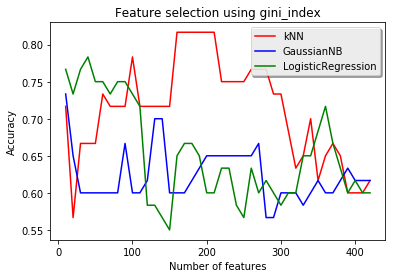

In [0]:
from skfeature.function.statistical_based import gini_index
score = gini_index.gini_index(x_a, y_a)
idx = gini_index.feature_ranking(score)

rank_gini_index = {}
p = 0;
for q in idx:
    if X_filtered.columns[q] not in rank_gini_index:
        rank_gini_index[X_filtered.columns[q]] = p+1
        p=p+1;
        
#rank_gini_index

sort_ind = sorted(rank_gini_index, key=rank_gini_index.get, reverse = False)


nf = []
acc_all_svm = []
acc_all_knn = []
acc_all_lo_reg = []
for it in range(int(X_filtered.columns.size/10)):
    num_fea = 10 * (it+1)
    nf.append(num_fea)
    col = sort_ind[0:num_fea]
    
    selected_features_train = X_filtered.ix[:, col].copy()
    selected_features_test = x_test.ix[:, col].copy()

    #SVM classifier (linear)
    from sklearn import svm
    clf = GaussianNB()
    clf.fit(selected_features_train, y_train)

    y_predict_svm = clf.predict(selected_features_test)

    from sklearn.metrics import accuracy_score
    acc_svm = accuracy_score(y_test, y_predict_svm)
    acc_all_svm.append(acc_svm)

    from sklearn import svm
    from sklearn.neural_network import MLPClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neighbors import KNeighborsClassifier


    clf_knn = KNeighborsClassifier(n_neighbors=7)
    clf_knn.fit(selected_features_train, y_train)
    y_predict_knn = clf_knn.predict(selected_features_test)
    acc_knn = accuracy_score(y_test, y_predict_knn)
    acc_all_knn.append(acc_knn)

    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    # Train the model using the training sets and check score
    model.fit(selected_features_train, y_train)
    model.score(selected_features_train, y_train)
    y_predict_lo_reg= model.predict(selected_features_test)
    acc_lo_reg = accuracy_score(y_test, y_predict_lo_reg)
    acc_all_lo_reg.append(acc_lo_reg)
    
    
    
# f_classif
plot1, = plt.plot(nf,acc_all_knn,  'r')
plot2, = plt.plot(nf,acc_all_svm,  'b')
plot3, = plt.plot(nf,acc_all_lo_reg,  'g')

# make legend
plt.legend((plot1, plot2, plot3), ('kNN', 'GaussianNB', 'LogisticRegression'), loc='upper right', shadow=True)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Feature selection using gini_index')
plt.show()

             precision    recall  f1-score   support

          0       1.00      0.20      0.33        30
          1       0.56      1.00      0.71        30

avg / total       0.78      0.60      0.52        60

[[ 6 24]
 [ 0 30]]
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       0.95      0.67      0.78        30
          1       0.74      0.97      0.84        30

avg / total       0.85      0.82      0.81        60

[[20 10]
 [ 1 29]]
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       1.00      0.40      0.57        30
          1       0.62      1.00      0.77        30

avg / total       0.81      0.70      0.67        60

[[12 18]
 [ 0 30]]
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1

 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       0.73      0.27      0.39        30
          1       0.55      0.90      0.68        30

avg / total       0.64      0.58      0.54        60

[[ 8 22]
 [ 3 27]]
[1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       1.00      0.20      0.33        30
          1       0.56      1.00      0.71        30

avg / total       0.78      0.60      0.52        60

[[ 6 24]
 [ 0 30]]
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       0.91      0.67      0.77        30
          1       0.74      0.93      0.82        30

avg / total       0.82      0.80      0.80        60

[[20 10]
 [ 2 28]]
[0 1

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       0.95      0.67      0.78        30
          1       0.74      0.97      0.84        30

avg / total       0.85      0.82      0.81        60

[[20 10]
 [ 1 29]]
[0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       1.00      0.40      0.57        30
          1       0.62      1.00      0.77        30

avg / total       0.81      0.70      0.67        60

[[12 18]
 [ 0 30]]
[0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       1.00      0.33      0.50        30
          1       0.60      1.00      0.75        30

avg / total       0.80      0.67      0.62        60

[[10 20]
 [ 0 30]]
[1 1

 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       1.00      0.30      0.46        30
          1       0.59      1.00      0.74        30

avg / total       0.79      0.65      0.60        60

[[ 9 21]
 [ 0 30]]
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       0.91      0.70      0.79        30
          1       0.76      0.93      0.84        30

avg / total       0.83      0.82      0.81        60

[[21  9]
 [ 2 28]]
[0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       1.00      0.50      0.67        30
          1       0.67      1.00      0.80        30

avg / total       0.83      0.75      0.73        60

[[15 15]
 [ 0 30]]
[0 1

 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       0.80      0.40      0.53        30
          1       0.60      0.90      0.72        30

avg / total       0.70      0.65      0.63        60

[[12 18]
 [ 3 27]]
[0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       0.92      0.37      0.52        30
          1       0.60      0.97      0.74        30

avg / total       0.76      0.67      0.63        60

[[11 19]
 [ 1 29]]
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       0.85      0.73      0.79        30
          1       0.76      0.87      0.81        30

avg / total       0.81      0.80      0.80        60

[[22  8]
 [ 4 26]]
[0 1

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       0.59      0.80      0.68        30
          1       0.68      0.43      0.53        30

avg / total       0.63      0.62      0.60        60

[[24  6]
 [17 13]]
[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0]
             precision    recall  f1-score   support

          0       0.75      0.50      0.60        30
          1       0.62      0.83      0.71        30

avg / total       0.69      0.67      0.66        60

[[15 15]
 [ 5 25]]
[0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0
 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1]
             precision    recall  f1-score   support

          0       0.71      0.33      0.45        30
          1       0.57      0.87      0.68        30

avg / total       0.64      0.60      0.57        60

[[10 20]
 [ 4 26]]
[1 1

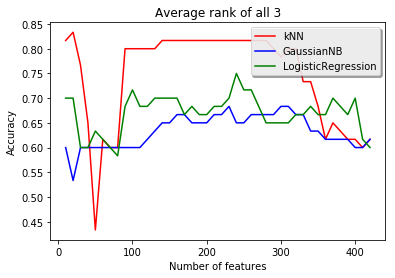

In [0]:
# average ranking of all

from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

avg = {}
for k,v in rank_SelectKBest_f_classif.items():
    avg[k] =(rank_SelectKBest_f_classif[k]+rank_gini_index[k]+rank_rfe[k])/3
#avg

sort_ind = sorted(avg, key=avg.get, reverse = False)


nf = []
acc_all_svm = []
acc_all_knn = []
acc_all_lo_reg = []
for it in range(int(X_filtered.columns.size/10)):
    num_fea = 10 * (it+1)
    nf.append(num_fea)
    col = sort_ind[0:num_fea]
    
    selected_features_train = X_filtered.ix[:, col].copy()
    selected_features_test = x_test.ix[:, col].copy()

    #SVM classifier (linear)
    
    clf = GaussianNB()
    clf.fit(selected_features_train, y_train)

    y_predict_svm = clf.predict(selected_features_test)

    
    acc_svm = accuracy_score(y_test, y_predict_svm)
    acc_all_svm.append(acc_svm)
    
    print(classification_report(y_test, y_predict_svm))
    print(confusion_matrix(y_test, y_predict_svm))
    print(y_predict_svm)

    

    clf_knn = KNeighborsClassifier(n_neighbors=7)
    clf_knn.fit(selected_features_train, y_train)
    y_predict_knn = clf_knn.predict(selected_features_test)
    acc_knn = accuracy_score(y_test, y_predict_knn)
    acc_all_knn.append(acc_knn)

    print(classification_report(y_test, y_predict_knn))
    print(confusion_matrix(y_test, y_predict_knn))
    print(y_predict_knn)
    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    # Train the model using the training sets and check score
    model.fit(selected_features_train, y_train)
    model.score(selected_features_train, y_train)
    y_predict_lo_reg= model.predict(selected_features_test)
    acc_lo_reg = accuracy_score(y_test, y_predict_lo_reg)
    acc_all_lo_reg.append(acc_lo_reg)
    
    print(classification_report(y_test, y_predict_lo_reg))
    print(confusion_matrix(y_test, y_predict_lo_reg))
    print(y_predict_lo_reg)
    
    
# f_classif
plot1, = plt.plot(nf,acc_all_knn,  'r')
plot2, = plt.plot(nf,acc_all_svm,  'b')
plot3, = plt.plot(nf,acc_all_lo_reg,  'g')

# make legend
plt.legend((plot1, plot2, plot3), ('kNN', 'GaussianNB', 'LogisticRegression'), loc='upper right', shadow=True)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Average rank of all 3')
plt.show()

In [0]:
acc_all_lo_reg

[0.69999999999999996,
 0.69999999999999996,
 0.59999999999999998,
 0.59999999999999998,
 0.6333333333333333,
 0.6166666666666667,
 0.59999999999999998,
 0.58333333333333337,
 0.68333333333333335,
 0.71666666666666667,
 0.68333333333333335,
 0.68333333333333335,
 0.69999999999999996,
 0.69999999999999996,
 0.69999999999999996,
 0.69999999999999996,
 0.66666666666666663,
 0.68333333333333335,
 0.66666666666666663,
 0.66666666666666663,
 0.68333333333333335,
 0.68333333333333335,
 0.69999999999999996,
 0.75,
 0.71666666666666667,
 0.71666666666666667,
 0.68333333333333335,
 0.65000000000000002,
 0.65000000000000002,
 0.65000000000000002,
 0.65000000000000002,
 0.66666666666666663,
 0.66666666666666663,
 0.68333333333333335,
 0.66666666666666663,
 0.66666666666666663,
 0.69999999999999996,
 0.68333333333333335,
 0.66666666666666663,
 0.69999999999999996,
 0.6166666666666667,
 0.59999999999999998]

In [0]:
col = sort_ind[0:10]
selected_features_train = X_filtered.ix[:, col].copy()
selected_features_test = x_test.ix[:, col].copy()

In [0]:
selected_features_test['label'] = y_test

In [0]:
n_0 = np.concatenate((np.arange(0,60,12), np.arange(1,60,12)))
n_10 = np.concatenate((np.arange(2,60,12), np.arange(3,60,12)))
n_20 = np.concatenate((np.arange(4,60,12), np.arange(5,60,12)))
n_30 = np.concatenate((np.arange(6,60,12), np.arange(7,60,12)))
n_40 = np.concatenate((np.arange(8,60,12), np.arange(9,60,12)))
n_50 = np.concatenate((np.arange(10,60,12), np.arange(11,60,12)))

In [0]:
n_0_test = selected_features_test.iloc[n_0, :].copy()
n_10_test = selected_features_test.iloc[n_10, :].copy()
n_20_test = selected_features_test.iloc[n_20, :].copy()
n_30_test = selected_features_test.iloc[n_30, :].copy()
n_40_test = selected_features_test.iloc[n_40, :].copy()
n_50_test = selected_features_test.iloc[n_50, :].copy()

In [0]:
n_acc_knn = []
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=7)
clf_knn.fit(selected_features_train, y_train)

acc_knn = accuracy_score(n_0_test['label'], clf_knn.predict(n_0_test.drop('label', 1)))
n_acc_knn.append(acc_knn)

acc_knn = accuracy_score(n_10_test['label'], clf_knn.predict(n_10_test.drop('label', 1)))
n_acc_knn.append(acc_knn)

acc_knn = accuracy_score(n_20_test['label'], clf_knn.predict(n_20_test.drop('label', 1)))
n_acc_knn.append(acc_knn)

acc_knn = accuracy_score(n_30_test['label'], clf_knn.predict(n_30_test.drop('label', 1)))
n_acc_knn.append(acc_knn)

acc_knn = accuracy_score(n_40_test['label'], clf_knn.predict(n_40_test.drop('label', 1)))
n_acc_knn.append(acc_knn)

acc_knn = accuracy_score(n_50_test['label'], clf_knn.predict(n_50_test.drop('label', 1)))
n_acc_knn.append(acc_knn)

In [0]:
n_acc_nb = []
clf = GaussianNB()
clf.fit(selected_features_train, y_train)


acc_nb = accuracy_score(n_0_test['label'], clf.predict(n_0_test.drop('label', 1)))
n_acc_nb.append(acc_nb)

acc_nb = accuracy_score(n_10_test['label'], clf.predict(n_10_test.drop('label', 1)))
n_acc_nb.append(acc_nb)

acc_nb = accuracy_score(n_20_test['label'], clf.predict(n_20_test.drop('label', 1)))
n_acc_nb.append(acc_nb)

acc_nb = accuracy_score(n_30_test['label'], clf.predict(n_30_test.drop('label', 1)))
n_acc_nb.append(acc_nb)

acc_nb = accuracy_score(n_40_test['label'], clf.predict(n_40_test.drop('label', 1)))
n_acc_nb.append(acc_nb)

acc_nb = accuracy_score(n_50_test['label'], clf.predict(n_50_test.drop('label', 1)))
n_acc_nb.append(acc_nb)

In [0]:
n_acc_lg = []
from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression()
clf_lg.fit(selected_features_train, y_train)


acc_lg = accuracy_score(n_0_test['label'], clf_lg.predict(n_0_test.drop('label', 1)))
n_acc_lg.append(acc_lg)

acc_lg = accuracy_score(n_10_test['label'], clf_lg.predict(n_10_test.drop('label', 1)))
n_acc_lg.append(acc_lg)

acc_lg = accuracy_score(n_20_test['label'], clf_lg.predict(n_20_test.drop('label', 1)))
n_acc_lg.append(acc_lg)

acc_lg = accuracy_score(n_30_test['label'], clf_lg.predict(n_30_test.drop('label', 1)))
n_acc_lg.append(acc_lg)

acc_lg = accuracy_score(n_40_test['label'], clf_lg.predict(n_40_test.drop('label', 1)))
n_acc_lg.append(acc_lg)

acc_lg = accuracy_score(n_50_test['label'], clf_lg.predict(n_50_test.drop('label', 1)))
n_acc_lg.append(acc_lg)

In [0]:
clf.predict(n_0_test.drop('label', 1))

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [0]:
noi = [0,  10, 20, 30, 40, 50]

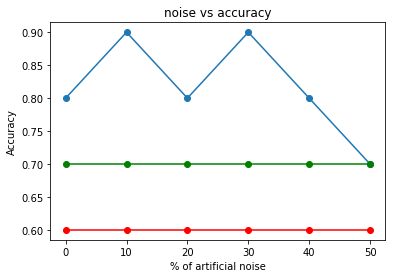

In [0]:
plot1, = plt.plot(noi,n_acc_knn, marker='o')
plot2, = plt.plot(noi,n_acc_nb,  'r', marker='o')
plot3, = plt.plot(noi,n_acc_lg,  'g', marker='o')

# make legend
#plt.legend((plot1, plot2, plot3), ('kNN', 'Naive Bayes', 'Logistic Regression'), loc='upper right', shadow=True)
plt.xlabel('% of artificial noise')
plt.ylabel('Accuracy')
plt.title('noise vs accuracy')
plt.show()

In [0]:
# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)